# Exploración de Datos

In [1]:
import pandas as pd
pd.options.plotting.backend = "plotly"
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/Shareddrives/Datathon 2022/Datos_Agrupados.csv')

In [4]:
df.columns = ['Filial', 'Fecha', 'Tipo', 'Ventas', 'Precio por Litro', 'Tem_prom']

In [5]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df = df.sort_values(['Fecha'])

In [6]:
df

,Filial,Fecha,Tipo,Ventas,Precio por Litro,Tem_prom
6277,"Galeana, Nuevo León, México",2019-01-01,Autotanque,3836.0,9.699284,14.2
19378,"Reynosa, Tamaulipas, México",2019-01-01,Autotanque,3543.0,9.700111,17.4
19379,"Reynosa, Tamaulipas, México",2019-01-01,EC,23832.0,10.024812,17.4
21562,"Rioverde, San Luis Potosí, México",2019-01-01,Autotanque,1254.0,9.657844,18.4
23739,"Salinas Victoria, Nuevo León, México",2019-01-01,Autotanque,818.0,9.886637,14.2
...,...,...,...,...,...,...
19377,"Poza Rica, Veracruz, México",2021-12-31,EC,18297.0,12.783474,21.2
21560,"Reynosa, Tamaulipas, México",2021-12-31,Autotanque,72304.0,10.699530,22.2
21561,"Reynosa, Tamaulipas, México",2021-12-31,EC,93364.0,10.743773,22.2
4600,"Ciudad Valles, San Luis Potosí, México",2021-12-31,Autotanque,42334.0,11.777952,20.7


# Series de Tiempo

In [7]:
fig = px.line(df[df['Tipo']=='EC'], x="Fecha", y="Ventas", color='Filial',
              title='Ventas gas tipo EC por filial (2019-2021)')
fig.show()

In [8]:
fig = px.line(df[df['Tipo']=='Autotanque'], x="Fecha", y="Ventas", color='Filial',
              title='Ventas gas tipo Autotanque por filial (2019-2021)')
fig.show()

Precio por litro y fecha filtrado por Tipo en Santa Catarina, Nuevo León. (Original)

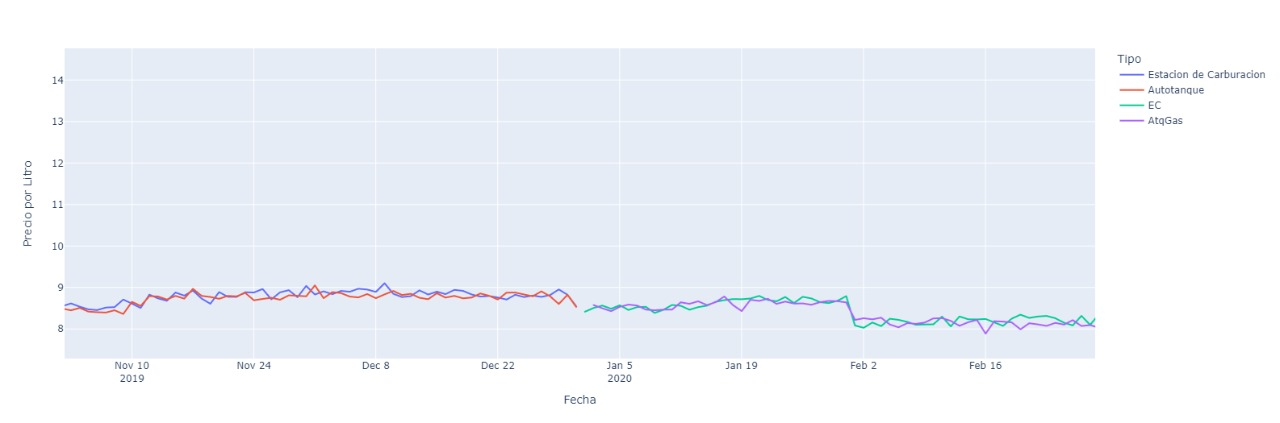

Precio por litro y fecha filtrado por Tipo en Santa Catarina, Nuevo León. (Actualizado)

In [9]:
fig = px.line(df[df['Filial']=='Santa Catarina, Nuevo León, México'], x="Fecha", y="Precio por Litro", color='Tipo',
              title='Precio por litro por tipo (Santa Catarina, Nuevo Leoón (2019-2021)')
fig.show()

In [10]:
fig = px.line(df[df['Tipo']=='EC'], x="Fecha", y="Tem_prom", color='Filial',
              title='Temperatura por filial (2019-2021)')
fig.show()

# Modelos de Predicción

## Regresión Lineal

In [11]:
df_model = df.copy()

In [12]:
# Discretization
df_model.loc[df_model['Tipo']=='EC', 'Tipo'] = 0
df_model.loc[df_model['Tipo']=='Autotanque', 'Tipo'] = 1

In [13]:
# Set date index
df_model = df_model.set_index('Fecha')

In [14]:
# Test location and gas type
df_model = df_model[df_model['Filial']=='Salinas Victoria, Nuevo León, México']
df_model = df_model[df_model['Tipo']==0]

In [15]:
X = df_model.drop(columns=['Filial', 'Ventas']) # independent variables
y = df_model['Ventas'] # dependent variable

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [18]:
y_pred = pd.Series(reg.predict(X_test), index=y_test.index)

In [19]:
compare = pd.DataFrame()
compare['y_test'] = y_test.sort_index()
compare['y_pred'] = y_pred.sort_index()

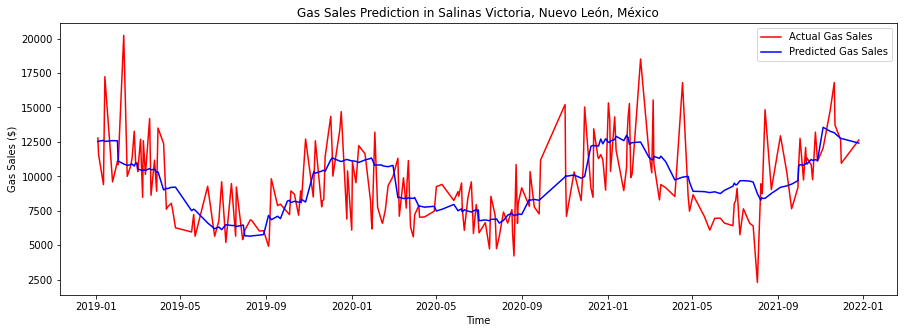

In [20]:
plt.figure(figsize = (15,5))
plt.plot(compare['y_test'], color='red', label='Actual Gas Sales')
plt.plot(compare['y_pred'], color='blue', label='Predicted Gas Sales')
plt.title('Gas Sales Prediction in Salinas Victoria, Nuevo León, México')
plt.xlabel('Time')
plt.ylabel('Gas Sales ($)')
plt.legend(loc='best')
plt.show()

In [29]:
from sklearn import metrics
print('R2', reg.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 0.3696810012459014
Root Mean Squared Error: 2292.2250538316407


## Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(max_depth=3)
rforest.fit(X_train, y_train)

RandomForestRegressor(max_depth=3)

In [23]:
y_pred_forest = pd.Series(rforest.predict(X_test), index=X_test.index)

In [24]:
compare_forest = pd.DataFrame()
compare_forest['y'] = y_test.sort_index()
compare_forest['y_pred'] = y_pred_forest.sort_index()

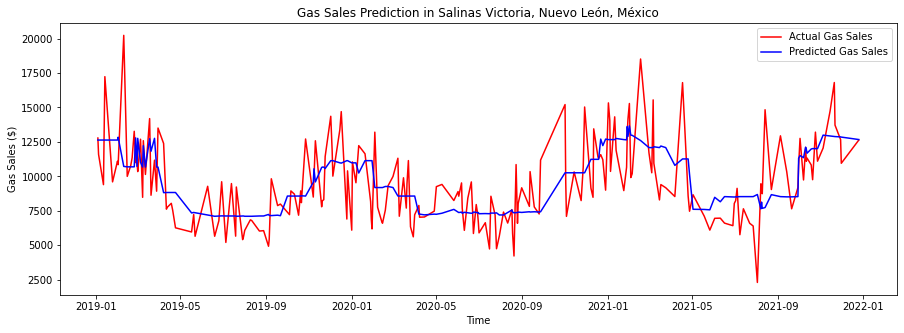

In [25]:
plt.figure(figsize = (15,5))
plt.plot(compare_forest['y'], color='red', label='Actual Gas Sales')
plt.plot(compare_forest['y_pred'], color='blue', label='Predicted Gas Sales')
plt.title('Gas Sales Prediction in Salinas Victoria, Nuevo León, México')
plt.xlabel('Time')
plt.ylabel('Gas Sales ($)')
plt.legend(loc='best')
plt.show()

In [26]:
from sklearn import metrics
print('R2:', rforest.score(X_test, y_test))
print('Root Mean Squared Error:',  np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest)))


R2: 0.3945400087494254
Root Mean Squared Error: 2246.5691009875645


In [27]:
def ran_forest_gas(df, filial, tipo, precio_litro, tem_prom):
  df_filter = df[df['Filial']==filial]
  df_filter = df[df['Tipo']==0]
  
  X = df_filter.drop(columns=['Filial', 'Ventas']) # independent variables
  y = df_filter['Ventas'] # dependent variable

  rforest = RandomForestRegressor(max_depth=3, random_state=42)
  rforest.fit(X, y)

  y_pred_forest = pd.Series(rforest.predict(X), index=X.index)

  compare_forest = pd.DataFrame()
  compare_forest['y'] = y
  compare_forest['y_pred'] = y_pred_forest

  plt.figure(figsize = (15,5))
  plt.plot(compare_forest['y'], color='red', label='Actual Gas Sales')
  plt.plot(compare_forest['y_pred'], color='blue', label='Predicted Gas Sales')
  plt.title('Gas Sales Prediction in ' + filial)
  plt.xlabel('Time')
  plt.ylabel('Gas Sales ($)')
  plt.legend(loc='best')
  plt.show()

  prediction = rforest.predict(pd.DataFrame.from_dict({'Tipo':[tipo], 'Precio por Litro':[precio_litro], 'Tem_prom':[tem_prom]}))
  prediction_show = 'Pronóstico de ventas: $' + str(prediction[0])
  return prediction_show

# Predicciones del Usuario

---Lista de ubicaciones---
Galeana, Nuevo León, México
Reynosa, Tamaulipas, México
Rioverde, San Luis Potosí, México
Salinas Victoria, Nuevo León, México
Álamo, Veracruz, México
Saltillo, Coahuila, México
Poza Rica, Veracruz, México
San Luis Potosí, San Luis Potosí, México
Allende, Nuevo León, México
Santa Catarina, Nuevo León, México
Soto la Marina, Tamaulipas, México
Tampico, Tamaulipas, México
San Nicolás de los Garza, Nuevo León, México
Linares, Nuevo León, México
Montemorelos, Nuevo León, México
Jiménez, Tamaulipas, México
Matehuala, Tamaulipas, México
San Rafael, Veracruz, México
Ciudad Victoria, Tamaulipas, México
San Fernando, Tamaulipas, México
Aldama, Tamaulipas, México
Vargas, Tamaulipas, México
Ciudad Valles, San Luis Potosí, México

Ingresa la ubicación (filial): Salinas Victoria, Nuevo León, México
Ingresa el tipo de gas {EC:0, Autotanque:1}: 0
Ingresa el precio por litro: 9
Ingresa la temperatura: 23


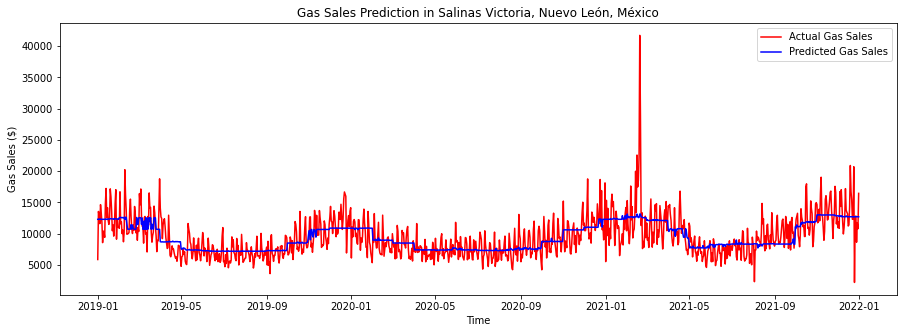

'Pronóstico de ventas: $8645.0266452805'

In [28]:
ubicaciones = """---Lista de ubicaciones---
Galeana, Nuevo León, México
Reynosa, Tamaulipas, México
Rioverde, San Luis Potosí, México
Salinas Victoria, Nuevo León, México
Álamo, Veracruz, México
Saltillo, Coahuila, México
Poza Rica, Veracruz, México
San Luis Potosí, San Luis Potosí, México
Allende, Nuevo León, México
Santa Catarina, Nuevo León, México
Soto la Marina, Tamaulipas, México
Tampico, Tamaulipas, México
San Nicolás de los Garza, Nuevo León, México
Linares, Nuevo León, México
Montemorelos, Nuevo León, México
Jiménez, Tamaulipas, México
Matehuala, Tamaulipas, México
San Rafael, Veracruz, México
Ciudad Victoria, Tamaulipas, México
San Fernando, Tamaulipas, México
Aldama, Tamaulipas, México
Vargas, Tamaulipas, México
Ciudad Valles, San Luis Potosí, México
"""
texto_ubicaciones = ubicaciones + '\nIngresa la ubicación (filial): '
filial = input(texto_ubicaciones)
tipo = int(input('Ingresa el tipo de gas {EC:0, Autotanque:1}: '))
precio_litro = int(input('Ingresa el precio por litro: '))
tem_prom = int(input('Ingresa la temperatura: '))

ran_forest_gas(df_model, filial, tipo, precio_litro, tem_prom)